## Instructions

Answer the following questions. It behooves you to answer as much of each question as possible to receive some partial credit. You are advised to begin this lab early so that you have ample time to complete it. **Make sure that your code is commented appropriately to receive full credit on each problem**

## Assignment

This assignment is worth 100 points. There are three sections to this homework assignment: a Fundamentals section, an Essentials section, and an Advanced section. You have all of the tools you need to complete all of the lab, but it is triaged for you to give you an idea of what you should focus on first.

### Fundamentals (30 points)

1. (10 points) What is the difference between a `Series` and a `DataFrame`?

  > Answer:

2. (10 points) What is the difference between the `.loc` and `.iloc` attributes for a pandas DataFrame?

  > Answer: 

3. (10 points) What is the difference between a copy and in-place sorting? Why might you want to use one over the other?

> Answer:

### Essentials (50 points)

4. (10 points) The following code imports a dataset about people who were on the Titanic and stores it in the variable `titanic`:

In [1]:
import pandas as pd

titanic = pd.read_csv("Titanic.csv")

Display the first few rows of the data set below:

In [2]:
## Answer:

print(titanic)

     PassengerID Survived  Pclass     Sex   Age  sibsp  parch     Fare  \
0            846       No       3    Male  42.0      0      0   7.5500   
1            747       No       3    Male  16.0      1      1  20.2500   
2            280      Yes       3  Female  35.0      1      1  20.2500   
3            309       No       2    Male  30.0      1      0  24.0000   
4            875      Yes       2  Female  28.0      1      0  24.0000   
..           ...      ...     ...     ...   ...    ...    ...      ...   
886          496       No       3    Male   NaN      0      0  14.4583   
887          200       No       2  Female  24.0      0      0  13.0000   
888          112       No       3  Female  14.5      1      0  14.4542   
889          241       No       3  Female   NaN      1      0  14.4542   
890          423       No       3    Male  29.0      0      0   7.8750   

    Embarked  
0          S  
1          S  
2          S  
3          C  
4          C  
..       ...  
886   

5. (10 points) Create a subset of the titanic data set of passengers who were in first class (`Pclass == 1`).

In [3]:
## Answer

firstClass = titanic[titanic.Pclass == 1]
print(firstClass)

     PassengerID Survived  Pclass     Sex    Age  sibsp  parch      Fare  \
14           731      Yes       1  Female  29.00      0      0  211.3375   
16           306      Yes       1    Male   0.92      1      2  151.5500   
17           298       No       1  Female   2.00      1      2  151.5500   
18           499       No       1  Female  25.00      1      2  151.5500   
21           461      Yes       1    Male  48.00      0      0   26.5500   
..           ...      ...     ...     ...    ...    ...    ...       ...   
872          156       No       1    Male  51.00      0      1   61.3792   
876          352       No       1    Male    NaN      0      0   35.0000   
879           56      Yes       1    Male    NaN      0      0   35.5000   
880          556       No       1    Male  62.00      0      0   26.5500   
883          326      Yes       1  Female  36.00      0      0  135.6333   

    Embarked  
14         S  
16         S  
17         S  
18         S  
21         S

6. (15 points) Create a histogram of the ages of passengers who were in first class.

14     29.00
16      0.92
17      2.00
18     25.00
21     48.00
       ...  
872    51.00
876      NaN
879      NaN
880    62.00
883    36.00
Name: Age, Length: 216, dtype: float64


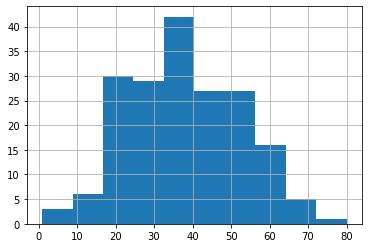

In [4]:
## Answer

firstClassAges = firstClass.Age
print(firstClassAges)
_ = firstClassAges.hist()

7. (15 points) Create a copy of the entire Titanic data set where the observations are sorted by the number of siblings or spouses (`sibsp`) the passengers has on board.

In [5]:
## Answer

titanicCopy = titanic.sort_values('sibsp')
print(titanicCopy)

     PassengerID Survived  Pclass     Sex   Age  sibsp  parch   Fare Embarked
0            846       No       3    Male  42.0      0      0   7.55        S
536          153       No       3    Male  55.5      0      0   8.05        S
537          197       No       3    Male   NaN      0      0   7.75        Q
538          809       No       2    Male  39.0      0      0  13.00        S
541          457       No       1    Male  65.0      0      0  26.55        S
..           ...      ...     ...     ...   ...    ...    ...    ...      ...
720          160       No       3    Male   NaN      8      2  69.55        S
725          202       No       3    Male   NaN      8      2  69.55        S
726          325       No       3    Male   NaN      8      2  69.55        S
723          793       No       3  Female   NaN      8      2  69.55        S
722          864       No       3  Female   NaN      8      2  69.55        S

[891 rows x 9 columns]


### Advanced (20 points)

8. (20 points) A common question in data science is to try and determine if there is a difference between two groups. For instance, we might wonder if the sex of the passenger on the Titanic affected whether or not they survived. We will explore this question here. One method for establishing a relationship is the following:
        
     + Randomly divide pick a subset of 314 observations. (The number of women on board the titanic) 
     + Record the proportion of people who survived in that random group
     + Repeat this process 10000 times.
     + Create a histogram of this information.
     + Add a vertical line to this histogram representing the proportion of women who survived. 
     + Check to see if this value is extreme relative to the random samples.
     
Write a Python script below which performs this task. For the random subset task, you should look up the `.sample()` method for DataFrames. 

0.7420382165605095


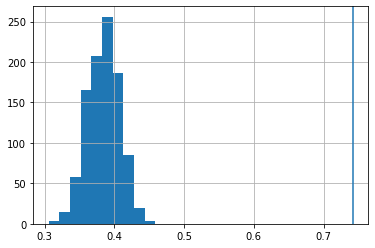

In [15]:
## Answer

proportions = []
for i in range(1000):
    sample = titanic.sample(n = 314)
    survivors = sample[sample.Survived == 'Yes']
    proportions.append(survivors.shape[0]/314)

women = titanic[titanic.Sex == 'Female']
womenSurvivors = women[women.Survived == 'Yes']
liveWomen = womenSurvivors.shape[0]/women.shape[0]
print(liveWomen)

proportions = pd.Series(proportions)
_ = proportions.hist()
_.axvline(liveWomen)

The proportion of women that survived is extreme relative to the random sample